In [16]:
import os
import sys
from glob import glob
import SimpleITK as sitk
import numpy as np
import pandas as pd

sys.path.append('/home/mingot/lung_cancer_ds_bowl/src/')
from utils import reading
from utils import preprocessing

ORIGINAL_PATH = '/home/shared/data/luna/images'
PROC_PATH = '/mnt/hd2/preprocessed5_validation/'

patient_files = glob(ORIGINAL_PATH + '/*.mhd')  # patients from subset
df_nodules = pd.read_csv('/home/shared/data/luna/annotations.csv')

COMMON_SPACING = [2, 0.7, 0.7]


In [27]:
for idx,patient_file in enumerate(patient_files):
    if idx<50:
        continue
    
    print "File %d/%d" % (idx, len(patient_files))
        
    patient = sitk.ReadImage(patient_file)
    patient_pixels = sitk.GetArrayFromImage(patient)  # indexes are z,y,x
    originalSpacing = [patient.GetSpacing()[2], patient.GetSpacing()[0], patient.GetSpacing()[1]]
    pat_id = patient_file.split('.')[-2]

    # load nodules
    seriesuid = patient_file.split('/')[-1].replace('.mhd', '')
    nodules = df_nodules[df_nodules["seriesuid"] == seriesuid]  # filter nodules for patient
    nodule_mask, changed = reading.create_mask(img=patient, nodules=nodules)

    if not changed:
        continue

    print 'Fixing patient %s' % patient_file

    # resampling
    nodule_mask, new_spacing = preprocessing.resample(nodule_mask, spacing=originalSpacing, new_spacing=COMMON_SPACING)

    # cropping
    nodule_mask = preprocessing.resize_image(nodule_mask, size=512)

    # storing
    proc_filename = PROC_PATH + "%s_%s.npz" % ('luna', pat_id)
    try:
        old = np.load(proc_filename)['arr_0']
    except:
        print 'No file: %s' % proc_filename
        continue
    old[2] = nodule_mask
    print 'Changing %s' % proc_filename
    np.savez_compressed(proc_filename, old)
    print 'done!'

File 50/888
File 51/888
File 52/888
File 53/888
File 54/888
File 55/888
File 56/888
File 57/888
File 58/888
File 59/888
File 60/888
File 61/888
File 62/888
File 63/888
File 64/888
File 65/888
File 66/888
File 67/888
File 68/888
File 69/888
File 70/888
File 71/888
File 72/888
File 73/888
File 74/888
File 75/888
File 76/888
File 77/888
File 78/888
File 79/888
File 80/888
File 81/888
File 82/888
File 83/888
File 84/888
File 85/888
File 86/888
File 87/888
File 88/888
File 89/888
File 90/888
File 91/888
File 92/888
File 93/888
File 94/888
File 95/888
File 96/888
File 97/888
File 98/888
File 99/888
File 100/888
File 101/888
File 102/888
File 103/888
File 104/888
File 105/888
File 106/888
File 107/888
File 108/888
File 109/888
File 110/888
Fixing patient /home/shared/data/luna/images/1.3.6.1.4.1.14519.5.2.1.6279.6001.282512043257574309474415322775.mhd
Changing /mnt/hd2/preprocessed5/luna_282512043257574309474415322775.npz
done!
File 111/888
File 112/888
File 113/888
File 114/888
File 115/888


7404
47
48
55
56
61
62
90
91
98
99
105
106


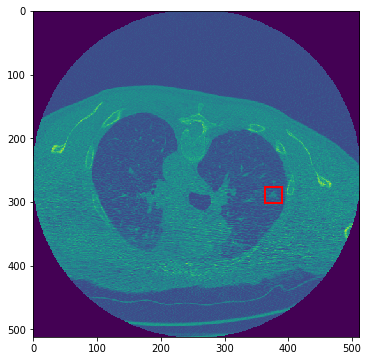

In [34]:
x = np.load('/mnt/hd2/preprocessed5/luna_148447286464082095534651426689.npz')['arr_0']
print np.sum(x[2])
for j in range(x.shape[1]):
    if np.sum(x[2,j])!=0:
        print j
        
from utils import plotting

plotting.plot_mask(x[0,98], x[2,98])